# Assignment 1 
### Julio Berrocal Alvarez
### Advanced Programming 


In [31]:
#%pip install py-readability-metrics
#%pip install pyPDF2

import nltk
from wordcloud import WordCloud, STOPWORDS
from readability import Readability
from PyPDF2 import PdfReader
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt    



In [2]:

import ssl  #used stack overflow for code below (necessary to run the nltk.download())
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

#-------------------------------------------------------------------------#

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/julioberrocal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/julioberrocal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/julioberrocal/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Article 1: Harvard president will submit dissertation edits after plagiarism allegations
The article talks about the allegations of plagiarism against Claudine Gay, Harvard's president. It provides information on how the allegations came along, the investigation into Gay's dissertation by Harvard and the resulting edits Gay is introducing into her dissertation. Additionally, the article mentions the backlash received by Gay after her comments in a congressional hearing regarding the Israel-Hamas conflict and the effects it has had on Harvard's college campus. 
The article appears very objective, only providing important information pertinent to the news, rather than any opinions the author, Gabriella Borter, may have. 


## Article 2: Embattled Harvard University President Claudine Gay hit with more plagiarism charges
This article also refers to the palgiarism allegations againts Claudine Gay, whilst also mentioning the backlash received by Gay due to her comments during a congressional hearing. However, this article presents itself as a more emotional article. It provides insights and opinions from different perspectives, such as Derrick Johnson, NAACP President, who believes this is a racial issue and a Harvard student who believes students are held to a higher standard than faculty, atleast in terms of plagiarism-related consequences. The article also quotes another source, the Free Beacon, who claim they have completed an investigation into other numerous instances of Gay's plagiarism. Overall, this article focuses on the same topics as the previous one, but offers a more subjective and emotional view of events accompanied by a more aggresive, condemning tone.

In [3]:
#Reuters Text

r_reader = PdfReader('/Users/julioberrocal/Desktop/Classes/Winter 2024/Advanced Programming/Assignment1_Files/Reuters.pdf')
r_pages = len(r_reader.pages)
r_text = ''

for i in range(r_pages):
    text = r_reader.pages[i].extract_text()
    r_text += text + ' '
 
r_text

'1 / 3Gabriella BorterHarvard president will submit dissertation edits after\nplagiarism allegations\nreuters.com /world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21\nHarvard University President Claudine Gay testifies before a House Education and The\nWorkforce Committee hearing titled "Holding Campus Leaders Accountable and Confronting\nAntisemitism" on Capitol Hill in W ashington, U.S., December 5, 2023. REUTERS/Ken\nCedeno/File Photo Acquire Licensing Rights\nDec 21 (Reuters) - Harvard University\'s president was planning to submit three corrections to\nher 1997 dissertation after a committee investigating plagiarism allegations against her found\nthat she had made citation errors, a university spokesperson said.\nClaudine Gay , who was inaugurated as Harvard\'s president in September , has already\nsubmitted corrections to two published articles in recent weeks that were the focus of a\nreview by the Harvard Corporation, the university\

In [4]:
#Fox Text

f_reader = PdfReader('/Users/julioberrocal/Desktop/Classes/Winter 2024/Advanced Programming/Assignment1_Files/Foxnews.pdf')
f_pages = len(f_reader.pages)
f_text = ''

for i in range(f_pages):
    text = f_reader.pages[i].extract_text()
    f_text += text + ' '

f_text

'1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit\nwith more plagiarism charges\nfoxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges\nMedia\nHarvard ‘received a complaint outlining over 40 allegations of\nplagiarism,’ according to the Free Beacon\n By Brian Flood  Fox News\nPublished December 20, 2023 12:59pm EST\nHarvard president facing 40 new allegations of plagiarism\nFox News\' Molly Line reports the latest on the allegations. \nEmbattled Harvard University President Claudine Gay  has been slapped with additional\ncharges of plagiarism. \nThe Washington Free Beacon  reported Harvard "received a complaint outlining over 40\nallegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard\'s\nresearch integrity of ficer, Stacey Springs, outlining the claims. \n"The document paints a picture of a pattern of misconduct more extensive than has been\npreviously reported and puts the Harvard Cor

## Anomalies in both texts ##

The pdf reader seems to be extracting every piece of text from the pdf, which means that, along with the article, it extracted advertisements within the body of the article and the 'about the author' section of both of the readings. This will probably affect the validity of the sentiment analysis and readability metrics I will calculate after. One way to correct this issue could be utilizing Regex to find these unwanted sections and remove them from the final text. Another anomaly found on both texts is the incorrect spacing of some of the words, this problem could probably be fixed with Regex as well, but would probably take some time to figure out the correct pattern. Apart from these anomalies, both of the texts seem to be correctly extracted from the pdf.

In [14]:
#Sentiment Analysis and opinion
sia = SentimentIntensityAnalyzer()

sentiment_dict_r = sia.polarity_scores(r_text)
sentiment_dict_f = sia.polarity_scores(f_text)


if sentiment_dict_r['compound'] >= 0.05:
    print("Reuters article has Positive sentiment")
    print(sentiment_dict_r)
elif sentiment_dict_r['compound'] <= -0.05:
    print("Reuters article has Negative sentiment")
    print(sentiment_dict_r)
else:
    print("Reuters article has Neutral sentiment")
    print(sentiment_dict_r)

if sentiment_dict_f['compound'] >= 0.05:
    print("Fox article has Positive sentiment")
    print(sentiment_dict_f)
elif sentiment_dict_f['compound'] <= -0.05:
    print("Fox article has Negative sentiment")
    print(sentiment_dict_f)
else:
    print("Fox article has Neutral sentiment")
    print(sentiment_dict_f)


'''
I am very surprised with the results of the sentiment analysis. In my opinion, the reuters article has a
completely neutral sentiment, as it is mostly facts and details related to the allegations against Claudine Gay.
It is interesting to note that the reuters article has a very large score in the neutral category, but it's compounded 
score is vastly negative.

Inversely, the Fox article, which I thought had a very negative sentiment, as it was fueled with opinions and 
a presumption of guilt, seems to have a very high overall positive sentiment score. It also has a high score in the neutral category, 
such as reuters, which makes it confusing as to why their compound scores differ so much.
'''

Reuters article has Negative sentiment
{'neg': 0.07, 'neu': 0.904, 'pos': 0.026, 'compound': -0.9719}
Fox article has Positive sentiment
{'neg': 0.064, 'neu': 0.863, 'pos': 0.073, 'compound': 0.8346}


"\nI am very surprised with the results of the sentiment analysis. In my opinion, the reuters article has a\ncompletely neutral sentiment, as it is mostly facts and details related to the allegations against Claudine Gay.\nIt is interesting to note that the reuters article has a very large score in the neutral category, but it's compounded \nscore is vastly negative.\n\nInversely, the Fox article, which I thought had a very negative sentiment, as it was fueled with opinions and \na presumption of guilt, seems to have a very high overall positive sentiment score. It also has a high score in the neutral category, \nsuch as reuters, which makes it confusing as to why their compound scores differ so much.\n"

In [15]:
#Sentiment Analysis of Article Headlines

r_title = 'Harvard president will submit dissertation edits after plagiarism allegations'
f_title = 'Embattled Harvard University President Claudine Gay hit with more plagiarism charges'

r_title_sent = sia.polarity_scores(r_title)
f_title_sent = sia.polarity_scores(f_title)

if r_title_sent['compound'] >= 0.05:
    print("Reuters Headline has Positive sentiment")
    print(r_title_sent)
elif r_title_sent['compound'] <= -0.05:
    print("Reuters Headline has Negative sentiment")
    print(r_title_sent)
else:
    print("Reuters Headline has Neutral sentiment")
    print(r_title_sent)

if f_title_sent['compound'] >= 0.05:
    print("Fox Headline has Positive sentiment")
    print(f_title_sent)
elif f_title_sent['compound'] <= -0.05:
    print("Fox Headline has Negative sentiment")
    print(f_title_sent)
else:
    print("Fox Headline has Neutral sentiment")
    print(f_title_sent)


''' 
The sentiment analysis of just the headlines of both articles seems to match my initial predictions a lot better.
The reuters article appears to have a perfectly neutral headline, whilst the fox article has a more negative headline.
This differs from the sentiment analysis of the entire text, as the reuters showed a very high negative sentiment score
and the fox article displayed a high positive sentiment score.
'''



Reuters Headline has Neutral sentiment
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Fox Headline has Negative sentiment
{'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3353}


In [19]:
#Readability Metrics #1

reuters = Readability(r_text)
fox = Readability(f_text)

#Flesch-Kincaid Grade Level
#This metric allows us to rank a piece of text to the appropriate education grade level it should belong to, focuses on word/sentence length.

fk_reuters = reuters.flesch_kincaid()
print(f'This is the fk score for reuters:{fk_reuters.score}')
print(f'This is the recommended grade level for reuters:{fk_reuters.grade_level}')

fk_fox = fox.flesch_kincaid()
print(f'This is the fk score for Fox:{fk_fox.score}')
print(f'This is the recommended grade level for Fox:{fk_fox.grade_level}')

'''
It appears that both scores are, in my opinion, unexpectedly high, meaning that in order to comprehend them properly 
one must be a graduate student, according to this metric.
'''

This is the fk score for reuters:18.02006831424553
This is the recommended grade level for reuters:18
This is the fk score for Fox:19.21912993097889
This is the recommended grade level for Fox:19


In [21]:
#Readability Metrics #2

#Flesch Reading Ease
# A metric that provides texts with a score, from 1 to 100, indicating the easiness to read. A higher score means an easier text.

f_reuters = reuters.flesch()
print(f'This is the flesch score for reuters:{f_reuters.score}')
print(f'This is the ease level for reuters:{f_reuters.ease}')

f_fox = fox.flesch()
print(f'This is the flesch score for Fox:{f_fox.score}')
print(f'This is the ease level for Fox:{f_fox.ease}')

'''
Both texts have very low flesch scores, which means they are very difficult to read.
This rating is consistent with the flesch-kincaid score previously calculated,
as that score predicted that only people with lots of education would be able to properly
understand these articles. Once again, it seems very farfetched to me, but it could be due
to some of the anomalies in the text. 
'''


This is the flesch score for reuters:18.384675005023126
This is the ease level for reuters:very_confusing
This is the flesch score for Fox:21.41115320671068
This is the ease level for Fox:very_confusing


'\nBoth texts have very low flesch scores, which means they are very difficult to read.\nThis rating is consistent with the flesch-kincaid score previously calculated,\nas that score predicted that only people with lots of education would be able to properly\nunderstand these articles. Once again, it seems very farfetched to me, but it could be due\nto some of the anomalies in the text. \n'

In [22]:
#Readability Metrics #3

#Dale Chall Readability 
#Another reading ease metric, but this one is based on the use of familiar words.

dc_reuters = reuters.dale_chall()
print(f'This is the Dale Chall score for reuters:{dc_reuters.score}')
print(f'This is the Dale Chall grade level for reuters:{dc_reuters.grade_levels}')

dc_fox = fox.dale_chall()
print(f'This is the Dale Chall score for Fox:{dc_fox.score}')
print(f'This is the Dale Chall grade level for Fox:{dc_fox.grade_levels}')

''' 
The scores for Dale Chall typically range from 0 to 10+, 
scores lower than 5 equate to 4th grade or lower grade levels, 
whilst 10+ scores are for college graduates. This means that both of these
articles are meant for college graduate audiences. This is consistent with the
two prior readability metrics calculated (Flesch-Kincaid and Flesch scores).  
'''



This is the Dale Chall score for reuters:12.527085332529637
This is the Dale Chall grade level for reuters:['college_graduate']
This is the Dale Chall score for Fox:12.77964083329135
This is the Dale Chall grade level for Fox:['college_graduate']


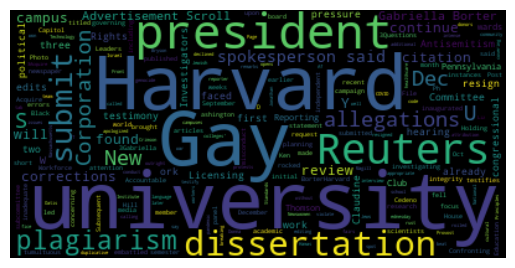

In [32]:
#Wordcloud Reuters

stopwords = set(STOPWORDS)
r_cloud = WordCloud(stopwords=stopwords)


r_cloud.generate(r_text)
plt.imshow(r_cloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

'''
The wordcloud seems consistent with the contents of the article as all of the main words utilized have a greater font.
'''


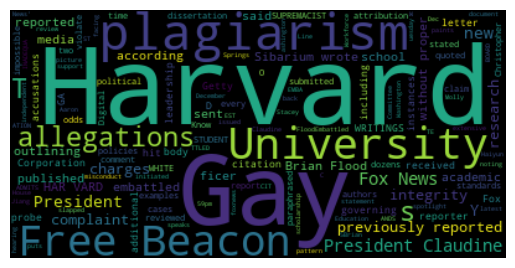

In [33]:
#Wordcloud Fox
stopwords = set(STOPWORDS)
f_cloud = WordCloud(stopwords=stopwords)


f_cloud.generate(f_text)
plt.imshow(f_cloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

''' 
The wordcloud seems consistent with the contents of the article. It is particularly interesting to me how the "free beacon" made
it as one of the most used words, highlighting the amount of times this source was mentioned throughout the short article.
'''